In [1]:
import pandas as pd
import numpy as np
import datetime as dy
import seaborn as sn


In [2]:
data = pd.read_csv('data/H2HBABBA2114.csv')
df = pd.DataFrame(data)

In [3]:
df.head()
val = df.isin(['CCU002']).any().any()
df[df['cust_number'] == 'CCU002']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
283,U001,CCU002,KRFT FDS in,2019-05-31 00:00:00,2019.0,1.929196e+09,2019-04-25,20190423,20190425,20190530.0,USD,RV,1.0,NaN,61344.76,20190425.0,NAG2,1.929196e+09,0
909,U001,CCU002,KRFT FDS trust,2020-02-28 00:00:00,2020.0,1.930427e+09,2020-01-22,20200122,20200122,20200226.0,USD,RV,1.0,NaN,15418.68,20200122.0,NAG2,1.930427e+09,0
961,U001,CCU002,KRFT FDS,2019-11-27 00:00:00,2019.0,1.930040e+09,2019-10-23,20191021,20191023,20191127.0,USD,RV,1.0,NaN,18409.35,20191023.0,NAG2,1.930040e+09,0
1297,U001,CCU002,KRFT FDS co,2019-12-20 00:00:00,2019.0,1.930190e+09,2019-11-28,20191124,20191128,20200102.0,USD,RV,1.0,NaN,11679.36,20191128.0,NAG2,1.930190e+09,0
1430,U001,CCU002,KRFT FDS trust,2019-06-28 00:00:00,2019.0,1.929300e+09,2019-05-13,20190511,20190513,20190617.0,USD,RV,1.0,NaN,13879.68,20190513.0,NAG2,1.929300e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47217,U001,CCU002,KRFT FDS llc,2019-11-01 00:00:00,2019.0,1.929911e+09,2019-09-25,20190923,20190925,20191030.0,USD,RV,1.0,NaN,44698.50,20190925.0,NAG2,1.929911e+09,0
47597,U001,CCU002,KRFT FDS systems,2019-11-01 00:00:00,2019.0,1.929845e+09,2019-09-09,20190907,20190909,20191014.0,USD,RV,1.0,NaN,11632.32,20190909.0,NAG2,1.929845e+09,0
48155,U001,CCU002,KRFT FDS corporation,2019-05-31 00:00:00,2019.0,1.929157e+09,2019-04-20,20190416,20190420,20190525.0,USD,RV,1.0,NaN,67713.77,20190420.0,NAG2,1.929157e+09,0
49759,U001,CCU002,KRFT FDS us,2019-05-03 00:00:00,2019.0,1.928944e+09,2019-03-13,20190311,20190313,20190417.0,USD,RV,1.0,NaN,8945.28,20190313.0,NAG2,1.928944e+09,0


In [4]:
cnt = df.nunique()
cnt

business_code                 6
cust_number                1430
name_customer              4159
clear_date                  397
buisness_year                 2
doc_id                    48839
posting_date                501
document_create_date        503
document_create_date.1      502
due_in_date                 551
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44166
baseline_create_date        506
cust_payment_terms           72
invoice_id                48835
isOpen                        2
dtype: int64

In [5]:
df.shape

(50000, 19)

In [6]:
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

# Data preprocessing and cleaning

In [7]:
## collected all the rows where clear_date is NAN

clear_test = df[df['clear_date'].isnull()]
clear_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200795490,HY - trust,NaN,2020.0,1.930686e+09,2020-03-23,20200323,20200323,20200407.0,USD,RV,1.0,NaN,15070.62,20200323.0,NAA8,1.930686e+09,1
8,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930708e+09,2020-03-29,20200330,20200329,20200413.0,USD,RV,1.0,NaN,67073.81,20200329.0,NAH4,1.930708e+09,1
13,U001,0200759878,SA corporation,NaN,2020.0,1.930798e+09,2020-04-20,20200417,20200420,20200505.0,USD,RV,1.0,NaN,13229.08,20200420.0,NAH4,1.930798e+09,1
14,U001,0200762301,C&S WH co,NaN,2020.0,1.930730e+09,2020-04-02,20200401,20200402,20200417.0,USD,RV,1.0,NaN,6704.47,20200402.0,NAC6,1.930730e+09,1
27,CA02,0140104409,LOB in,NaN,2020.0,2.960628e+09,2020-04-14,20200414,20200414,20200503.0,CAD,RV,1.0,NaN,100440.00,20200423.0,CA10,2.960628e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49957,U001,0200707822,PUBLI,NaN,2020.0,1.930759e+09,2020-04-07,20200407,20200407,20200422.0,USD,RV,1.0,NaN,80959.18,20200407.0,NAA8,1.930759e+09,1
49958,U001,0200794332,COST trust,NaN,2020.0,1.930582e+09,2020-02-28,20200228,20200228,20200314.0,USD,RV,1.0,NaN,6992.48,20200228.0,NAAX,1.930582e+09,1
49961,U001,0200230690,DECA in,NaN,2020.0,1.930857e+09,2020-05-05,20200505,20200505,20200511.0,USD,RV,1.0,NaN,7183.64,20200501.0,NAM2,1.930857e+09,1
49968,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930621e+09,2020-03-08,20200307,20200308,20200323.0,USD,RV,1.0,NaN,13246.84,20200308.0,NAH4,1.930621e+09,1


In [8]:
data_remove = df.drop(['area_business'],axis=1)
data_remove.shape

(50000, 18)

In [9]:
data_remove = data_remove.drop(['document_create_date.1'], axis=1)
data_remove

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200759878,SA us,2019-07-09 00:00:00,2019.0,1.929031e+09,2019-03-26,20190326,20190410.0,USD,RV,1.0,170.30,20190326.0,NAX2,1.929031e+09,0
1,U001,0200795490,HY - trust,NaN,2020.0,1.930686e+09,2020-03-23,20200323,20200407.0,USD,RV,1.0,15070.62,20200323.0,NAA8,1.930686e+09,1
2,U001,0200764795,SYSCO llc,2019-08-13 00:00:00,2019.0,1.929609e+09,2019-07-10,20190711,20190811.0,USD,RV,1.0,9955.83,20190710.0,NA32,1.929609e+09,0
3,U001,0200714710,SYSCO us,2019-12-26 00:00:00,2019.0,1.930256e+09,2019-12-10,20191210,20191225.0,USD,RV,1.0,9693.65,20191210.0,NAA8,1.930256e+09,0
4,U001,0200772670,ASSOCIAT associates,2019-02-20 00:00:00,2019.0,1.928733e+09,2019-02-04,20190204,20190219.0,USD,RV,1.0,148140.86,20190204.0,NAU5,1.928733e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR trust,2019-09-18 00:00:00,2019.0,1.929807e+09,2019-08-29,20190828,20190913.0,USD,RV,1.0,20389.10,20190829.0,NAH4,1.929807e+09,0
49996,U001,0200712187,SPAR foundation,2019-09-16 00:00:00,2019.0,1.929813e+09,2019-08-30,20190830,20190914.0,USD,RV,1.0,139261.87,20190830.0,NAA8,1.929813e+09,0
49997,CA02,0140105785,SHOPPE corporation,NaN,2020.0,2.960619e+09,2020-03-09,20200309,20200321.0,CAD,RV,1.0,70849.04,20200311.0,CA10,2.960619e+09,1
49998,U001,0200721222,GO us,2019-02-01 00:00:00,2019.0,1.928612e+09,2019-01-14,20190112,20190129.0,USD,RV,1.0,65852.23,20190114.0,NAA8,1.928612e+09,0


In [10]:
test_clear_test = data_remove[data_remove['isOpen'] == 1]
test_clear_test


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200795490,HY - trust,NaN,2020.0,1.930686e+09,2020-03-23,20200323,20200407.0,USD,RV,1.0,15070.62,20200323.0,NAA8,1.930686e+09,1
8,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930708e+09,2020-03-29,20200330,20200413.0,USD,RV,1.0,67073.81,20200329.0,NAH4,1.930708e+09,1
13,U001,0200759878,SA corporation,NaN,2020.0,1.930798e+09,2020-04-20,20200417,20200505.0,USD,RV,1.0,13229.08,20200420.0,NAH4,1.930798e+09,1
14,U001,0200762301,C&S WH co,NaN,2020.0,1.930730e+09,2020-04-02,20200401,20200417.0,USD,RV,1.0,6704.47,20200402.0,NAC6,1.930730e+09,1
27,CA02,0140104409,LOB in,NaN,2020.0,2.960628e+09,2020-04-14,20200414,20200503.0,CAD,RV,1.0,100440.00,20200423.0,CA10,2.960628e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49957,U001,0200707822,PUBLI,NaN,2020.0,1.930759e+09,2020-04-07,20200407,20200422.0,USD,RV,1.0,80959.18,20200407.0,NAA8,1.930759e+09,1
49958,U001,0200794332,COST trust,NaN,2020.0,1.930582e+09,2020-02-28,20200228,20200314.0,USD,RV,1.0,6992.48,20200228.0,NAAX,1.930582e+09,1
49961,U001,0200230690,DECA in,NaN,2020.0,1.930857e+09,2020-05-05,20200505,20200511.0,USD,RV,1.0,7183.64,20200501.0,NAM2,1.930857e+09,1
49968,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930621e+09,2020-03-08,20200307,20200323.0,USD,RV,1.0,13246.84,20200308.0,NAH4,1.930621e+09,1


In [11]:
temp_saver = test_clear_test.copy(deep=True)
temp_saver

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200795490,HY - trust,NaN,2020.0,1.930686e+09,2020-03-23,20200323,20200407.0,USD,RV,1.0,15070.62,20200323.0,NAA8,1.930686e+09,1
8,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930708e+09,2020-03-29,20200330,20200413.0,USD,RV,1.0,67073.81,20200329.0,NAH4,1.930708e+09,1
13,U001,0200759878,SA corporation,NaN,2020.0,1.930798e+09,2020-04-20,20200417,20200505.0,USD,RV,1.0,13229.08,20200420.0,NAH4,1.930798e+09,1
14,U001,0200762301,C&S WH co,NaN,2020.0,1.930730e+09,2020-04-02,20200401,20200417.0,USD,RV,1.0,6704.47,20200402.0,NAC6,1.930730e+09,1
27,CA02,0140104409,LOB in,NaN,2020.0,2.960628e+09,2020-04-14,20200414,20200503.0,CAD,RV,1.0,100440.00,20200423.0,CA10,2.960628e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49957,U001,0200707822,PUBLI,NaN,2020.0,1.930759e+09,2020-04-07,20200407,20200422.0,USD,RV,1.0,80959.18,20200407.0,NAA8,1.930759e+09,1
49958,U001,0200794332,COST trust,NaN,2020.0,1.930582e+09,2020-02-28,20200228,20200314.0,USD,RV,1.0,6992.48,20200228.0,NAAX,1.930582e+09,1
49961,U001,0200230690,DECA in,NaN,2020.0,1.930857e+09,2020-05-05,20200505,20200511.0,USD,RV,1.0,7183.64,20200501.0,NAM2,1.930857e+09,1
49968,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930621e+09,2020-03-08,20200307,20200323.0,USD,RV,1.0,13246.84,20200308.0,NAH4,1.930621e+09,1


In [12]:
## removing all the rows with null values

data_remove = data_remove.dropna(axis=0,how='any')


In [13]:
data_remove

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200759878,SA us,2019-07-09 00:00:00,2019.0,1.929031e+09,2019-03-26,20190326,20190410.0,USD,RV,1.0,170.30,20190326.0,NAX2,1.929031e+09,0
2,U001,0200764795,SYSCO llc,2019-08-13 00:00:00,2019.0,1.929609e+09,2019-07-10,20190711,20190811.0,USD,RV,1.0,9955.83,20190710.0,NA32,1.929609e+09,0
3,U001,0200714710,SYSCO us,2019-12-26 00:00:00,2019.0,1.930256e+09,2019-12-10,20191210,20191225.0,USD,RV,1.0,9693.65,20191210.0,NAA8,1.930256e+09,0
4,U001,0200772670,ASSOCIAT associates,2019-02-20 00:00:00,2019.0,1.928733e+09,2019-02-04,20190204,20190219.0,USD,RV,1.0,148140.86,20190204.0,NAU5,1.928733e+09,0
5,U001,0200769623,WAL-MAR,2019-09-30 00:00:00,2019.0,1.929882e+09,2019-09-18,20190917,20191003.0,USD,RV,1.0,13045.06,20190918.0,NAH4,1.929882e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,CA02,0140104340,COLABOR associates,2019-03-21 00:00:00,2019.0,2.960532e+09,2019-03-04,20190304,20190315.0,CAD,RV,1.0,10274.21,20190305.0,CA10,2.960532e+09,0
49995,U001,0200769623,WAL-MAR trust,2019-09-18 00:00:00,2019.0,1.929807e+09,2019-08-29,20190828,20190913.0,USD,RV,1.0,20389.10,20190829.0,NAH4,1.929807e+09,0
49996,U001,0200712187,SPAR foundation,2019-09-16 00:00:00,2019.0,1.929813e+09,2019-08-30,20190830,20190914.0,USD,RV,1.0,139261.87,20190830.0,NAA8,1.929813e+09,0
49998,U001,0200721222,GO us,2019-02-01 00:00:00,2019.0,1.928612e+09,2019-01-14,20190112,20190129.0,USD,RV,1.0,65852.23,20190114.0,NAA8,1.928612e+09,0


In [14]:
remain_data = data_remove.copy(deep=True)
remain_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200759878,SA us,2019-07-09 00:00:00,2019.0,1.929031e+09,2019-03-26,20190326,20190410.0,USD,RV,1.0,170.30,20190326.0,NAX2,1.929031e+09,0
2,U001,0200764795,SYSCO llc,2019-08-13 00:00:00,2019.0,1.929609e+09,2019-07-10,20190711,20190811.0,USD,RV,1.0,9955.83,20190710.0,NA32,1.929609e+09,0
3,U001,0200714710,SYSCO us,2019-12-26 00:00:00,2019.0,1.930256e+09,2019-12-10,20191210,20191225.0,USD,RV,1.0,9693.65,20191210.0,NAA8,1.930256e+09,0
4,U001,0200772670,ASSOCIAT associates,2019-02-20 00:00:00,2019.0,1.928733e+09,2019-02-04,20190204,20190219.0,USD,RV,1.0,148140.86,20190204.0,NAU5,1.928733e+09,0
5,U001,0200769623,WAL-MAR,2019-09-30 00:00:00,2019.0,1.929882e+09,2019-09-18,20190917,20191003.0,USD,RV,1.0,13045.06,20190918.0,NAH4,1.929882e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,CA02,0140104340,COLABOR associates,2019-03-21 00:00:00,2019.0,2.960532e+09,2019-03-04,20190304,20190315.0,CAD,RV,1.0,10274.21,20190305.0,CA10,2.960532e+09,0
49995,U001,0200769623,WAL-MAR trust,2019-09-18 00:00:00,2019.0,1.929807e+09,2019-08-29,20190828,20190913.0,USD,RV,1.0,20389.10,20190829.0,NAH4,1.929807e+09,0
49996,U001,0200712187,SPAR foundation,2019-09-16 00:00:00,2019.0,1.929813e+09,2019-08-30,20190830,20190914.0,USD,RV,1.0,139261.87,20190830.0,NAA8,1.929813e+09,0
49998,U001,0200721222,GO us,2019-02-01 00:00:00,2019.0,1.928612e+09,2019-01-14,20190112,20190129.0,USD,RV,1.0,65852.23,20190114.0,NAA8,1.928612e+09,0


In [15]:
def conver_date(date):
    p_date = str(date)
    y = int(p_date[0:4])
    m = int(p_date[4:6])
    d = int(p_date[6:8])
    return dy.datetime(y,m,d)
    

In [16]:
data_remove['due_date'] = data_remove['due_in_date'].apply(conver_date)
data_remove
data_remove.dtypes

<ipython-input-16-c89d5b5e1297>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_remove['due_date'] = data_remove['due_in_date'].apply(conver_date)


business_code                   object
cust_number                     object
name_customer                   object
clear_date                      object
buisness_year                  float64
doc_id                         float64
posting_date                    object
document_create_date             int64
due_in_date                    float64
invoice_currency                object
document type                   object
posting_id                     float64
total_open_amount              float64
baseline_create_date           float64
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
due_date                datetime64[ns]
dtype: object

In [17]:
data_remove['clear_date'] = pd.to_datetime(data_remove['clear_date'])
data_remove

<ipython-input-17-efa40674e831>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_remove['clear_date'] = pd.to_datetime(data_remove['clear_date'])


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,due_date
0,U001,0200759878,SA us,2019-07-09,2019.0,1.929031e+09,2019-03-26,20190326,20190410.0,USD,RV,1.0,170.30,20190326.0,NAX2,1.929031e+09,0,2019-04-10
2,U001,0200764795,SYSCO llc,2019-08-13,2019.0,1.929609e+09,2019-07-10,20190711,20190811.0,USD,RV,1.0,9955.83,20190710.0,NA32,1.929609e+09,0,2019-08-11
3,U001,0200714710,SYSCO us,2019-12-26,2019.0,1.930256e+09,2019-12-10,20191210,20191225.0,USD,RV,1.0,9693.65,20191210.0,NAA8,1.930256e+09,0,2019-12-25
4,U001,0200772670,ASSOCIAT associates,2019-02-20,2019.0,1.928733e+09,2019-02-04,20190204,20190219.0,USD,RV,1.0,148140.86,20190204.0,NAU5,1.928733e+09,0,2019-02-19
5,U001,0200769623,WAL-MAR,2019-09-30,2019.0,1.929882e+09,2019-09-18,20190917,20191003.0,USD,RV,1.0,13045.06,20190918.0,NAH4,1.929882e+09,0,2019-10-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,CA02,0140104340,COLABOR associates,2019-03-21,2019.0,2.960532e+09,2019-03-04,20190304,20190315.0,CAD,RV,1.0,10274.21,20190305.0,CA10,2.960532e+09,0,2019-03-15
49995,U001,0200769623,WAL-MAR trust,2019-09-18,2019.0,1.929807e+09,2019-08-29,20190828,20190913.0,USD,RV,1.0,20389.10,20190829.0,NAH4,1.929807e+09,0,2019-09-13
49996,U001,0200712187,SPAR foundation,2019-09-16,2019.0,1.929813e+09,2019-08-30,20190830,20190914.0,USD,RV,1.0,139261.87,20190830.0,NAA8,1.929813e+09,0,2019-09-14
49998,U001,0200721222,GO us,2019-02-01,2019.0,1.928612e+09,2019-01-14,20190112,20190129.0,USD,RV,1.0,65852.23,20190114.0,NAA8,1.928612e+09,0,2019-01-29


In [18]:
data_remove['document_create_date'] = data_remove['document_create_date'].apply(conver_date)

<ipython-input-18-bf259ca30ea4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_remove['document_create_date'] = data_remove['document_create_date'].apply(conver_date)


In [19]:
## sorting data with respect to document_create_date


data_remove = data_remove.sort_values(by='document_create_date',ascending=True)
data_remove.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,due_date
17196,U001,0200974851,RESTA,2020-03-12,2020.0,1.930577e+09,2020-02-26,2020-02-27,20200312.0,USD,RV,1.0,4235.83,20200226.0,NAA8,1.930577e+09,0,2020-03-12
37145,U001,CCU013,KRAFT F us,2020-03-27,2020.0,1.930579e+09,2020-02-07,2020-02-27,20200207.0,USD,RV,1.0,23580.00,20200207.0,NAX2,1.930579e+09,0,2020-02-07
47964,U001,0200900909,SYSCO co,2020-03-16,2020.0,1.930577e+09,2020-02-26,2020-02-27,20200312.0,USD,RV,1.0,21595.63,20200226.0,NAA8,1.930577e+09,0,2020-03-12
32916,U001,0200865666,RESTAU llc,2020-03-12,2020.0,1.930577e+09,2020-02-26,2020-02-27,20200312.0,USD,RV,1.0,4304.37,20200226.0,NAA8,1.930577e+09,0,2020-03-12
26989,U001,0200895843,US associates,2020-03-13,2020.0,1.930581e+09,2020-02-27,2020-02-28,20200313.0,USD,RV,1.0,35655.90,20200227.0,NAA8,1.930581e+09,0,2020-03-13


In [20]:
# finding the target column by substracting cleardate from duedate

data_remove['target'] = (data_remove['clear_date'] - data_remove['due_date']).dt.days
data_remove


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,due_date,target
42408,U013,0140103335,PARAM foundation,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,20190129.0,USD,RV,1.0,24154.65,20181230.0,NAVE,1.991820e+09,0,2019-01-29,-6
28007,U013,CC5050,H.J. HE corporation,2019-03-22,2019.0,1.991819e+09,2018-12-30,2018-12-26,20190213.0,USD,RV,1.0,866.92,20181230.0,NAVF,1.991819e+09,0,2019-02-13,37
6509,U013,0140103311,GLOBA llc,2019-01-29,2019.0,1.991820e+09,2019-01-01,2018-12-28,20190131.0,USD,RV,1.0,43054.25,20190101.0,NAVE,1.991820e+09,0,2019-01-31,-2
3036,U013,0140103423,COS,2019-01-23,2019.0,1.991820e+09,2019-01-01,2018-12-28,20190131.0,USD,RV,1.0,6692.33,20190101.0,NAVE,1.991820e+09,0,2019-01-31,-8
811,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,20190114.0,USD,RV,1.0,55040.77,20181230.0,NAH4,1.928533e+09,0,2019-01-14,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17196,U001,0200974851,RESTA,2020-03-12,2020.0,1.930577e+09,2020-02-26,2020-02-27,20200312.0,USD,RV,1.0,4235.83,20200226.0,NAA8,1.930577e+09,0,2020-03-12,0
37145,U001,CCU013,KRAFT F us,2020-03-27,2020.0,1.930579e+09,2020-02-07,2020-02-27,20200207.0,USD,RV,1.0,23580.00,20200207.0,NAX2,1.930579e+09,0,2020-02-07,49
47964,U001,0200900909,SYSCO co,2020-03-16,2020.0,1.930577e+09,2020-02-26,2020-02-27,20200312.0,USD,RV,1.0,21595.63,20200226.0,NAA8,1.930577e+09,0,2020-03-12,4
32916,U001,0200865666,RESTAU llc,2020-03-12,2020.0,1.930577e+09,2020-02-26,2020-02-27,20200312.0,USD,RV,1.0,4304.37,20200226.0,NAA8,1.930577e+09,0,2020-03-12,0


In [21]:
data_remove['cust_number'].value_counts()
data_remove['name_customer'].value_counts()


WAL-MAR associates      935
WAL-MAR corporation     926
WAL-MAR us              902
WAL-MAR trust           892
WAL-MAR corp            884
                       ... 
WOODM us                  1
ACE C foundation          1
MC A llc                  1
LES ENTRE associates      1
POWE corp                 1
Name: name_customer, Length: 3865, dtype: int64

In [22]:
# Splitting of Train and test data

In [23]:
#### Splitting train and test data
data_remove.duplicated()


42408    False
28007    False
6509     False
3036     False
811      False
         ...  
17196    False
37145    False
47964    False
32916    False
26989    False
Length: 39996, dtype: bool

# EDA and feature engineering


In [24]:
from sklearn.preprocessing import LabelEncoder


In [25]:
labelen = LabelEncoder()
labelen.fit(data_remove['cust_payment_terms'])
data_remove['cust_payment_terms'] = labelen.transform(data_remove['cust_payment_terms'])
data_remove.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,due_date,target
42408,U013,0140103335,PARAM foundation,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,20190129.0,USD,RV,1.0,24154.65,20181230.0,58,1.991820e+09,0,2019-01-29,-6
28007,U013,CC5050,H.J. HE corporation,2019-03-22,2019.0,1.991819e+09,2018-12-30,2018-12-26,20190213.0,USD,RV,1.0,866.92,20181230.0,59,1.991819e+09,0,2019-02-13,37
6509,U013,0140103311,GLOBA llc,2019-01-29,2019.0,1.991820e+09,2019-01-01,2018-12-28,20190131.0,USD,RV,1.0,43054.25,20190101.0,58,1.991820e+09,0,2019-01-31,-2


In [26]:
data_remove = data_remove.drop(['due_in_date','isOpen'],axis=1)

In [27]:
data_remove['name_customer'].value_counts()

WAL-MAR associates      935
WAL-MAR corporation     926
WAL-MAR us              902
WAL-MAR trust           892
WAL-MAR corp            884
                       ... 
WOODM us                  1
ACE C foundation          1
MC A llc                  1
LES ENTRE associates      1
POWE corp                 1
Name: name_customer, Length: 3865, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
def change_date(x_type):
    x = str(x_type)
    year = int(x[0:4])
    month = int(x[4:6])
    day = int(x[6:8])
    return dy.datetime(year, month, day)

In [30]:
# data_remove['due_in_date'] = data_remove['due_in_date'].apply(change_date)

In [31]:
X = data_remove.drop(columns = ['target']).copy()
y = data_remove['target']

X_train, X_temp, y_train, y_temp = train_test_split(X,y, train_size=0.8,shuffle=False)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp, test_size=0.5,shuffle=False)



In [32]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,due_date,target
0,42408,U013,0140103335,PARAM foundation,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,USD,RV,1.0,24154.65,20181230.0,58,1.991820e+09,2019-01-29,-6
1,28007,U013,CC5050,H.J. HE corporation,2019-03-22,2019.0,1.991819e+09,2018-12-30,2018-12-26,USD,RV,1.0,866.92,20181230.0,59,1.991819e+09,2019-02-13,37
2,6509,U013,0140103311,GLOBA llc,2019-01-29,2019.0,1.991820e+09,2019-01-01,2018-12-28,USD,RV,1.0,43054.25,20190101.0,58,1.991820e+09,2019-01-31,-2
3,3036,U013,0140103423,COS,2019-01-23,2019.0,1.991820e+09,2019-01-01,2018-12-28,USD,RV,1.0,6692.33,20190101.0,58,1.991820e+09,2019-01-31,-8
4,811,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,USD,RV,1.0,55040.77,20181230.0,34,1.928533e+09,2019-01-14,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31991,8199,U001,0200769623,WAL-MAR corp,2019-12-02,2019.0,1.930164e+09,2019-11-19,2019-11-17,USD,RV,1.0,5925.31,20191119.0,34,1.930164e+09,2019-12-04,-2
31992,35998,CA02,0140106408,WAL-M corporation,2019-12-11,2019.0,2.960593e+09,2019-11-17,2019-11-17,CAD,RV,1.0,6373.10,20191117.0,6,2.960593e+09,2019-11-27,14
31993,17564,U001,0200794332,COST us,2019-12-03,2019.0,1.930164e+09,2019-11-19,2019-11-17,USD,RV,1.0,16650.79,20191119.0,22,1.930164e+09,2019-12-04,-1
31994,34440,U001,0200769623,WAL-MAR corp,2019-11-29,2019.0,1.930164e+09,2019-11-18,2019-11-17,USD,RV,1.0,45541.41,20191118.0,34,1.930164e+09,2019-12-03,-4


In [33]:
X_train = X_train.replace(['U002', 'U005', 'U007'], 'other')
X_valid = X_valid.replace(['U002', 'U005', 'U007'], 'other')
X_test = X_test.replace(['U002', 'U005', 'U007'], 'other')

business = pd.get_dummies(X_train['business_code'])
business1 = pd.get_dummies(X_valid['business_code'])
business2 = pd.get_dummies(X_test['business_code'])


X_train = pd.concat([X_train, business], axis=1)
X_valid = pd.concat([X_valid, business1], axis=1)
X_test = pd.concat([X_test, business2], axis=1)

X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,due_date,CA02,U001,U013,other
42408,U013,0140103335,PARAM foundation,2019-01-23,2019.0,1.991820e+09,2018-12-30,2018-12-26,USD,RV,1.0,24154.65,20181230.0,58,1.991820e+09,2019-01-29,0,0,1,0
28007,U013,CC5050,H.J. HE corporation,2019-03-22,2019.0,1.991819e+09,2018-12-30,2018-12-26,USD,RV,1.0,866.92,20181230.0,59,1.991819e+09,2019-02-13,0,0,1,0
6509,U013,0140103311,GLOBA llc,2019-01-29,2019.0,1.991820e+09,2019-01-01,2018-12-28,USD,RV,1.0,43054.25,20190101.0,58,1.991820e+09,2019-01-31,0,0,1,0
3036,U013,0140103423,COS,2019-01-23,2019.0,1.991820e+09,2019-01-01,2018-12-28,USD,RV,1.0,6692.33,20190101.0,58,1.991820e+09,2019-01-31,0,0,1,0
811,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,USD,RV,1.0,55040.77,20181230.0,34,1.928533e+09,2019-01-14,0,1,0,0


In [34]:
X_train.drop(['business_code'], axis =1 , inplace=True)
X_valid.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

In [35]:
X_train['document_create_date_day'] = X_train['document_create_date'].dt.day
X_train['document_create_date_month'] = X_train['document_create_date'].dt.month
X_train['document_create_date_year'] = X_train['document_create_date'].dt.year
X_train['document_create_date_quarter']= X_train['document_create_date'].dt.quarter

X_valid['document_create_date_day'] = X_valid['document_create_date'].dt.day
X_valid['document_create_date_month'] = X_valid['document_create_date'].dt.month
X_valid['document_create_date_year'] = X_valid['document_create_date'].dt.year
X_valid['document_create_date_quarter'] = X_valid['document_create_date'].dt.quarter

X_test['document_create_date_day'] = X_test['document_create_date'].dt.day
X_test['document_create_date_month'] = X_test['document_create_date'].dt.month
X_test['document_create_date_year'] = X_test['document_create_date'].dt.year
X_test['document_create_date_quarter'] = X_test['document_create_date'].dt.quarter

In [36]:
X_train = X_train.drop(['document_create_date'],axis=1)
X_valid = X_valid.drop(['document_create_date'],axis=1)
X_test = X_test.drop(['document_create_date'],axis=1)
X_train

,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,invoice_currency,document type,posting_id,total_open_amount,...,invoice_id,due_date,CA02,U001,U013,other,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date_quarter
42408,0140103335,PARAM foundation,2019-01-23,2019.0,1.991820e+09,2018-12-30,USD,RV,1.0,24154.65,...,1.991820e+09,2019-01-29,0,0,1,0,26,12,2018,4
28007,CC5050,H.J. HE corporation,2019-03-22,2019.0,1.991819e+09,2018-12-30,USD,RV,1.0,866.92,...,1.991819e+09,2019-02-13,0,0,1,0,26,12,2018,4
6509,0140103311,GLOBA llc,2019-01-29,2019.0,1.991820e+09,2019-01-01,USD,RV,1.0,43054.25,...,1.991820e+09,2019-01-31,0,0,1,0,28,12,2018,4
3036,0140103423,COS,2019-01-23,2019.0,1.991820e+09,2019-01-01,USD,RV,1.0,6692.33,...,1.991820e+09,2019-01-31,0,0,1,0,28,12,2018,4
811,0200769623,WAL-MAR in,2019-01-09,2019.0,1.928533e+09,2018-12-30,USD,RV,1.0,55040.77,...,1.928533e+09,2019-01-14,0,1,0,0,29,12,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8199,0200769623,WAL-MAR corp,2019-12-02,2019.0,1.930164e+09,2019-11-19,USD,RV,1.0,5925.31,...,1.930164e+09,2019-12-04,0,1,0,0,17,11,2019,4
35998,0140106408,WAL-M corporation,2019-12-11,2019.0,2.960593e+09,2019-11-17,CAD,RV,1.0,6373.10,...,2.960593e+09,2019-11-27,1,0,0,0,17,11,2019,4
17564,0200794332,COST us,2019-12-03,2019.0,1.930164e+09,2019-11-19,USD,RV,1.0,16650.79,...,1.930164e+09,2019-12-04,0,1,0,0,17,11,2019,4
34440,0200769623,WAL-MAR corp,2019-11-29,2019.0,1.930164e+09,2019-11-18,USD,RV,1.0,45541.41,...,1.930164e+09,2019-12-03,0,1,0,0,17,11,2019,4


In [37]:
X_train = X_train.drop(['buisness_year'],axis=1)
X_valid = X_valid.drop(['buisness_year'],axis=1)
X_test = X_test.drop(['buisness_year'],axis=1)
X_train

,cust_number,name_customer,clear_date,doc_id,posting_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,...,invoice_id,due_date,CA02,U001,U013,other,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date_quarter
42408,0140103335,PARAM foundation,2019-01-23,1.991820e+09,2018-12-30,USD,RV,1.0,24154.65,20181230.0,...,1.991820e+09,2019-01-29,0,0,1,0,26,12,2018,4
28007,CC5050,H.J. HE corporation,2019-03-22,1.991819e+09,2018-12-30,USD,RV,1.0,866.92,20181230.0,...,1.991819e+09,2019-02-13,0,0,1,0,26,12,2018,4
6509,0140103311,GLOBA llc,2019-01-29,1.991820e+09,2019-01-01,USD,RV,1.0,43054.25,20190101.0,...,1.991820e+09,2019-01-31,0,0,1,0,28,12,2018,4
3036,0140103423,COS,2019-01-23,1.991820e+09,2019-01-01,USD,RV,1.0,6692.33,20190101.0,...,1.991820e+09,2019-01-31,0,0,1,0,28,12,2018,4
811,0200769623,WAL-MAR in,2019-01-09,1.928533e+09,2018-12-30,USD,RV,1.0,55040.77,20181230.0,...,1.928533e+09,2019-01-14,0,1,0,0,29,12,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8199,0200769623,WAL-MAR corp,2019-12-02,1.930164e+09,2019-11-19,USD,RV,1.0,5925.31,20191119.0,...,1.930164e+09,2019-12-04,0,1,0,0,17,11,2019,4
35998,0140106408,WAL-M corporation,2019-12-11,2.960593e+09,2019-11-17,CAD,RV,1.0,6373.10,20191117.0,...,2.960593e+09,2019-11-27,1,0,0,0,17,11,2019,4
17564,0200794332,COST us,2019-12-03,1.930164e+09,2019-11-19,USD,RV,1.0,16650.79,20191119.0,...,1.930164e+09,2019-12-04,0,1,0,0,17,11,2019,4
34440,0200769623,WAL-MAR corp,2019-11-29,1.930164e+09,2019-11-18,USD,RV,1.0,45541.41,20191118.0,...,1.930164e+09,2019-12-03,0,1,0,0,17,11,2019,4


In [38]:
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(X_train['invoice_currency'])
X_train['invoice_currency_enc'] = invoice_currency_encoder.transform(X_train['invoice_currency'])
X_valid['invoice_currency_enc'] = invoice_currency_encoder.transform(X_valid['invoice_currency'])
X_test['invoice_currency_enc'] = invoice_currency_encoder.transform(X_test['invoice_currency'])

In [39]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

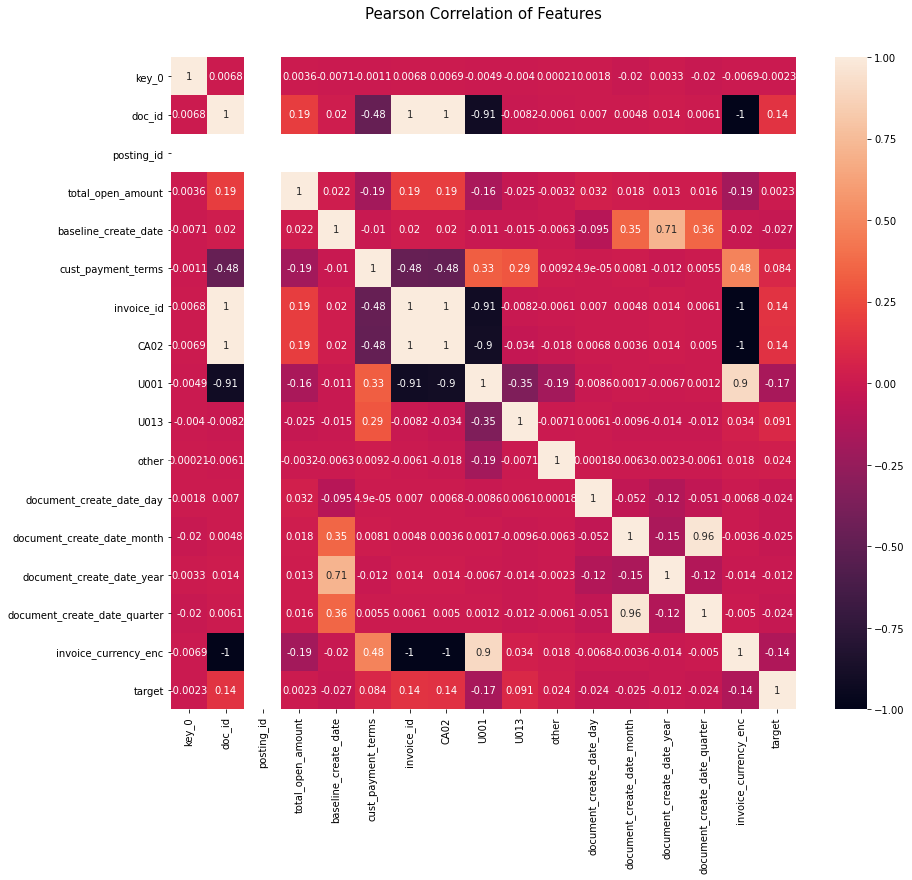

In [40]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sn.heatmap(X_train.merge(y_train , on = X_train.index ).corr(), annot=True)

In [41]:
X_train = X_train.drop(['cust_number','due_date','invoice_currency', 'name_customer', 'clear_date',
                       'posting_date', 'baseline_create_date',
                       ], axis = 1)


X_test = X_test.drop(['cust_number','due_date','invoice_currency', 'name_customer', 'clear_date',
                       'posting_date', 'baseline_create_date',
                       ], axis = 1)

X_valid = X_valid.drop(['cust_number','due_date','invoice_currency', 'name_customer', 'clear_date',
                       'posting_date', 'baseline_create_date',
                       ], axis = 1)




In [42]:
X_train = X_train.drop(['posting_id','document type'], axis = 1)


In [43]:
X_test = X_test.drop(['posting_id','document type'], axis = 1)
X_valid = X_valid.drop(['posting_id','document type'], axis = 1)


In [44]:
X_train.head(3)

,doc_id,total_open_amount,cust_payment_terms,invoice_id,CA02,U001,U013,other,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date_quarter,invoice_currency_enc
42408,1.991820e+09,24154.65,58,1.991820e+09,0,0,1,0,26,12,2018,4,1
28007,1.991819e+09,866.92,59,1.991819e+09,0,0,1,0,26,12,2018,4,1
6509,1.991820e+09,43054.25,58,1.991820e+09,0,0,1,0,28,12,2018,4,1


In [45]:
X_train.dtypes

doc_id                          float64
total_open_amount               float64
cust_payment_terms                int64
invoice_id                      float64
CA02                              uint8
U001                              uint8
U013                              uint8
other                             uint8
document_create_date_day          int64
document_create_date_month        int64
document_create_date_year         int64
document_create_date_quarter      int64
invoice_currency_enc              int64
dtype: object

# Model 

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [47]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_predict = base_model.predict(X_valid)
y_predict

array([ 0.53059493, -0.66164885,  0.83601049, ..., -4.93851253,
       -3.20569775, -3.21704129])

In [49]:
mean_squared_error(y_valid, y_predict, squared=False)

7.992611874733517

In [50]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])
met

,Predicted,Actuals
0,0.530595,-3
1,-0.661649,5
2,0.836010,0
3,-1.537769,5
4,-1.532838,-5
...,...,...
3995,-3.189079,0
3996,-3.190965,49
3997,-4.938513,4
3998,-3.205698,0




# Trained using random forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
random_model = RandomForestRegressor(n_estimators=500)


In [53]:
random_model.fit(X_train, y_train)

y_pred1 = random_model.predict(X_test)

#Checking the accuracy
random_model_accuracy = round(random_model.score(X_train, y_train)*100,2)
print(round(random_model_accuracy,2),'%')

90.61 %


In [54]:
y_predict_test = random_model.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

8.954979303394486

In [55]:
test_clear_test = test_clear_test.drop('posting_id',axis=1)

In [56]:
test_clear_test = test_clear_test.drop('isOpen',axis=1)

In [57]:
test_clear_test.columns,X_test.columns

(Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
        'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
        'due_in_date', 'invoice_currency', 'document type', 'total_open_amount',
        'baseline_create_date', 'cust_payment_terms', 'invoice_id'],
       dtype='object'),
 Index(['doc_id', 'total_open_amount', 'cust_payment_terms', 'invoice_id',
        'CA02', 'U001', 'U013', 'other', 'document_create_date_day',
        'document_create_date_month', 'document_create_date_year',
        'document_create_date_quarter', 'invoice_currency_enc'],
       dtype='object'))

In [58]:
term_enc = LabelEncoder()
term_enc.fit(test_clear_test['cust_payment_terms'])
test_clear_test['cust_payment_terms'] = term_enc.transform(test_clear_test['cust_payment_terms'])

In [59]:
test_clear_test = test_clear_test.replace(['U002', 'U005', 'U007'], 'other')

business = pd.get_dummies(test_clear_test['business_code'])

test_clear_test = pd.concat([test_clear_test, business], axis=1)
test_clear_test.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,CA02,U001,U013,other
1,U001,0200795490,HY - trust,NaN,2020.0,1.930686e+09,2020-03-23,20200323,20200407.0,USD,RV,15070.62,20200323.0,14,1.930686e+09,0,1,0,0
8,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930708e+09,2020-03-29,20200330,20200413.0,USD,RV,67073.81,20200329.0,29,1.930708e+09,0,1,0,0
13,U001,0200759878,SA corporation,NaN,2020.0,1.930798e+09,2020-04-20,20200417,20200505.0,USD,RV,13229.08,20200420.0,29,1.930798e+09,0,1,0,0


In [60]:
test_clear_test['document_create_date'] = test_clear_test['document_create_date'].apply(pd.to_datetime, format='%Y%m%d')

test_clear_test['document_create_date_day'] = test_clear_test['document_create_date'].dt.day
test_clear_test['document_create_date_month'] = test_clear_test['document_create_date'].dt.month
test_clear_test['document_create_date_year'] = test_clear_test['document_create_date'].dt.year
test_clear_test['document_create_date_quarter']= test_clear_test['document_create_date'].dt.quarter


In [61]:
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(test_clear_test['invoice_currency'])
test_clear_test['invoice_currency_enc'] = invoice_currency_encoder.transform(test_clear_test['invoice_currency'])

In [62]:
test_clear_test.drop(columns = ['business_code','due_in_date','cust_number','document_create_date','name_customer','clear_date','buisness_year','posting_date'],axis=1,inplace=True)

In [63]:
test_clear_test.drop(columns = ['invoice_currency','baseline_create_date'],axis=1,inplace=True)

In [64]:
test_clear_test = test_clear_test.drop('document type',axis=1)

In [65]:
test_clear_test.columns

Index(['doc_id', 'total_open_amount', 'cust_payment_terms', 'invoice_id',
       'CA02', 'U001', 'U013', 'other', 'document_create_date_day',
       'document_create_date_month', 'document_create_date_year',
       'document_create_date_quarter', 'invoice_currency_enc'],
      dtype='object')

In [66]:
final_result = random_model.predict(test_clear_test)


In [67]:
final_result = pd.Series(final_result,name='delay')
final_result

0       -5.518000
1        4.550000
2       -0.026000
3        1.478000
4        4.934467
          ...    
9995    -4.380000
9996     5.040000
9997     3.154000
9998    13.222000
9999     7.598800
Name: delay, Length: 10000, dtype: float64

In [68]:
test_clear_test.reset_index(drop=True,inplace=True)

In [69]:
X_main_test = test_clear_test

# Prediction for test data

In [70]:
Final = test_clear_test.merge(final_result , on = X_main_test.index )
Final

,key_0,doc_id,total_open_amount,cust_payment_terms,invoice_id,CA02,U001,U013,other,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date_quarter,invoice_currency_enc,delay
0,0,1.930686e+09,15070.62,14,1.930686e+09,0,1,0,0,23,3,2020,1,1,-5.518000
1,1,1.930708e+09,67073.81,29,1.930708e+09,0,1,0,0,30,3,2020,1,1,4.550000
2,2,1.930798e+09,13229.08,29,1.930798e+09,0,1,0,0,17,4,2020,2,1,-0.026000
3,3,1.930730e+09,6704.47,19,1.930730e+09,0,1,0,0,1,4,2020,2,1,1.478000
4,4,2.960628e+09,100440.00,5,2.960628e+09,1,0,0,0,14,4,2020,2,0,4.934467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1.930759e+09,80959.18,14,1.930759e+09,0,1,0,0,7,4,2020,2,1,-4.380000
9996,9996,1.930582e+09,6992.48,16,1.930582e+09,0,1,0,0,28,2,2020,1,1,5.040000
9997,9997,1.930857e+09,7183.64,31,1.930857e+09,0,1,0,0,5,5,2020,2,1,3.154000
9998,9998,1.930621e+09,13246.84,29,1.930621e+09,0,1,0,0,7,3,2020,1,1,13.222000


In [71]:
Final['delay'].max()

40.112

# Bucket

In [72]:
def Mapping(x):
    temp = []
    for i in list(x):
        if i < 0:
            temp.append("Payment done before due date.")
        elif i > 40:
            temp.append("Payment done 15 days after due date.")
        elif i > 30:
            temp.append("Payment done 30 days after due date.")
        elif i > 15:
            temp.append("Payment done 15 days after due date")
        
        else:
            temp.append("Payment done much after 1 day and before 15 day")
    return temp

col2 = Mapping(final_result)
bucket = pd.DataFrame()
bucket['Predictions'] = final_result
bucket['Bucket_list'] = col2
bucket.tail(10)

,Predictions,Bucket_list
9990,2.3300,Payment done much after 1 day and before 15 day
9991,1.7280,Payment done much after 1 day and before 15 day
9992,-3.8560,Payment done before due date.
9993,7.4400,Payment done much after 1 day and before 15 day
9994,3.4460,Payment done much after 1 day and before 15 day
9995,-4.3800,Payment done before due date.
9996,5.0400,Payment done much after 1 day and before 15 day
9997,3.1540,Payment done much after 1 day and before 15 day
9998,13.2220,Payment done much after 1 day and before 15 day
9999,7.5988,Payment done much after 1 day and before 15 day


In [71]:
temp_saver['pred'] = final_result
temp_saver

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,pred
1,U001,0200795490,HY - trust,NaN,2020.0,1.930686e+09,2020-03-23,20200323,20200407.0,USD,RV,1.0,15070.62,20200323.0,NAA8,1.930686e+09,1,4.008
8,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930708e+09,2020-03-29,20200330,20200413.0,USD,RV,1.0,67073.81,20200329.0,NAH4,1.930708e+09,1,-1.702
13,U001,0200759878,SA corporation,NaN,2020.0,1.930798e+09,2020-04-20,20200417,20200505.0,USD,RV,1.0,13229.08,20200420.0,NAH4,1.930798e+09,1,2.188
14,U001,0200762301,C&S WH co,NaN,2020.0,1.930730e+09,2020-04-02,20200401,20200417.0,USD,RV,1.0,6704.47,20200402.0,NAC6,1.930730e+09,1,-9.476
27,CA02,0140104409,LOB in,NaN,2020.0,2.960628e+09,2020-04-14,20200414,20200503.0,CAD,RV,1.0,100440.00,20200423.0,CA10,2.960628e+09,1,6.414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49957,U001,0200707822,PUBLI,NaN,2020.0,1.930759e+09,2020-04-07,20200407,20200422.0,USD,RV,1.0,80959.18,20200407.0,NAA8,1.930759e+09,1,NaN
49958,U001,0200794332,COST trust,NaN,2020.0,1.930582e+09,2020-02-28,20200228,20200314.0,USD,RV,1.0,6992.48,20200228.0,NAAX,1.930582e+09,1,NaN
49961,U001,0200230690,DECA in,NaN,2020.0,1.930857e+09,2020-05-05,20200505,20200511.0,USD,RV,1.0,7183.64,20200501.0,NAM2,1.930857e+09,1,NaN
49968,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930621e+09,2020-03-08,20200307,20200323.0,USD,RV,1.0,13246.84,20200308.0,NAH4,1.930621e+09,1,NaN


In [83]:
temp_saver.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
document_create_date      int64
due_in_date             float64
invoice_currency         object
document type            object
posting_id              float64
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
invoice_id              float64
isOpen                    int64
pred                    float64
dtype: object

In [90]:
remain_data['pred'] =0
remain_data

TypeError: 'int' object does not support item assignment

In [85]:
frames = [remain_data , temp_saver]

In [93]:
result = pd.concat(frames)
result.shape


# split1_train ,split1_test, split1_train2, split1_test2 = train_test_split(final_train, y, train_size = 0.8, random_state=0)

# split_train ,split_test, split_train2, split_test2 = train_test_split(split1_test, split1_test2 , test_size = 0.5, random_state=0)



(49996, 18)

In [91]:
result.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
document_create_date      int64
due_in_date             float64
invoice_currency         object
document type            object
posting_id              float64
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
invoice_id              float64
isOpen                    int64
pred                    float64
dtype: object

In [92]:
result.isna().sum()

business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
doc_id                      0
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
document type               0
posting_id                  0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
invoice_id                  0
isOpen                      0
pred                     7952
dtype: int64

In [94]:
result.to_csv('pred.csv')